## Revision History

* Update with your details here

* Name: Ashit Debdas

* Date: 11/28/2021

## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliances and light - using the provided data for a house in Belgium. 

If it is feasible and/or required to build a model 
- can you outline the approach, 
- build a proof of concept model with the available data and 
- architect a scenario where/how the model could be used. 

Please answer below questions based on your understanding
- How can we improve this perceived system?
- what challenges do you see in deploying this system?
- can you propose a timeline based on this PoC for this development?

Please use the notebook to record your thought process and code. Once you have performed the assessment, respond back with your solution in 5 days. You will be required to walk through the notebook in a technical discussion. 

A basic workflow is defined via code comments, which you may use. Please ensure to include your references in the last cell. 

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

Data repository : [link](http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv)

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

In [2]:
## The libraries you use
import dtale
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection, metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
## Read data and basic data clean-up
df = pd.read_csv("energydata_complete.csv")

In [4]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
# d = dtale.show(df)
# d

In [6]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
## strategy for missing value treatment
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
## Data exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [10]:
df.shape

(19735, 29)

In [11]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## key insights

* Independent variables : 28(11 temperature, 10 humidity, 1 pressure, 2 randoms)
* Dependent variable : 1 (Appliances)

* Date column is only used for understanding the consumption vs date time behavior and given this is not a time series problem it was removed .
* Light column was also removed as the are the reading of submeter and we are not focusing on appliance specific reading
* Number of Independent variables at this stage — 26
* Number of Dependent variable at this stage — 1
* Total number of rows — 19735
* The data set will be split 80–20 % between train & test.
* Total # of rows in training set — 14801
* Total # of rows in test set — 4934
* All the features have numerical values. There are no categorical or ordinal features.
* Number of missing values & null values = 0

In [13]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

Since this is not a timeseries problem and we will focus on predicting the appliance consumption , we can ignore Date column

In [14]:
# Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [15]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [16]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [18]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [19]:
col_temp_ = train[col_temp]
col_temp_.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000


* Observations 


* Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house

In [20]:
col_hum = train[col_hum]
col_hum.describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,40.271333,40.432370,39.252994,39.041339,50.939261,54.596942,35.401239,42.944133,41.567732
std,3.983201,4.081775,3.263513,4.355528,8.964531,31.163493,5.134281,5.240388,4.167305
min,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.363333,37.900000,36.900000,35.530000,45.400000,30.023333,31.500000,39.069091,38.500000
50%,39.656667,40.500000,38.560000,38.400000,49.090000,55.290000,34.900000,42.397143,40.900000
75%,43.090000,43.290000,41.790000,42.193333,53.694286,83.126667,39.000000,46.560000,44.363333
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


* Observations 


* Humidiy columns - Humidity inside house varies is between 20.46% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

In [21]:
col_weather = train[col_weather]
col_weather.describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054
std,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900
min,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000
25%,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000
50%,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000
75%,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000
max,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000


In [22]:
col_light = train[col_light + col_randoms ]
col_light.describe()

,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000
mean,3.809202,25.014452,25.014452
std,7.940816,14.539819,14.539819
min,0.000000,0.006033,0.006033
25%,0.000000,12.469764,12.469764
50%,0.000000,24.936900,24.936900
75%,0.000000,37.736202,37.736202
max,60.000000,49.993173,49.993173


* Observations 


* Lights column - Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence for now , I will dropping this column

In [23]:
col_randoms = train[col_randoms ]
col_randoms.describe()

,rv1,rv2
count,14801.000000,14801.000000
mean,25.014452,25.014452
std,14.539819,14.539819
min,0.006033,0.006033
25%,12.469764,12.469764
50%,24.936900,24.936900
75%,37.736202,37.736202
max,49.993173,49.993173


In [24]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


* Observations 


* Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

Feature ranges
1. Temperature : -6 to 29.85 deg
2. Humidity : 1 to 100 %
3. Windspeed : 0 to 14 m/s
4. Visibility : 1 to 66 km
5. Pressure : 729 to 772 mm Hg
6. Appliance Energy Usage : 10 to 1080 Wh

In [25]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

In [26]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.6,19.5,21.50,22.89,19.166667,2.863333,21.0,22.89,19.89,34.70,...,38.5,37.26,2.233333,0.4,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.7,21.0,25.39,23.60,19.890000,5.500000,23.0,24.20,22.60,40.29,...,43.4,44.59,6.266667,5.3,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677


#### Visualization

In [27]:
# plotly
from chart_studio import plotly
import plotly.express as px
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= df.date  ,  mode = "lines", y = df.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [28]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation , 
# decided not to use it for model evaluation as it has least impact

df['WEEKDAY'] = ((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
df['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [29]:
# Find rows with weekday 
temp_weekday =  df[df['WEEKDAY'] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [30]:
 #Find rows with weekday 

temp_weekend =  df[df['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

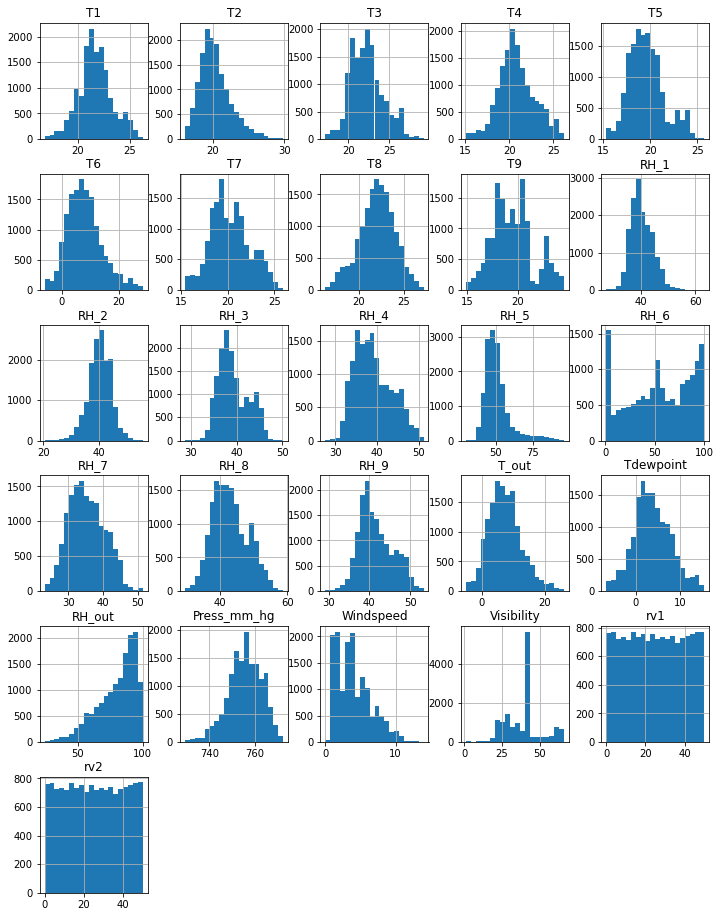

In [31]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

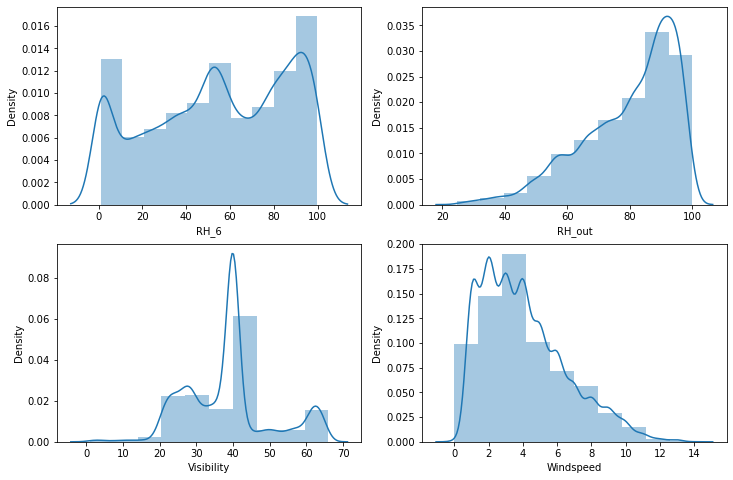

In [32]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001685D1F29D0>]],
      dtype=object)

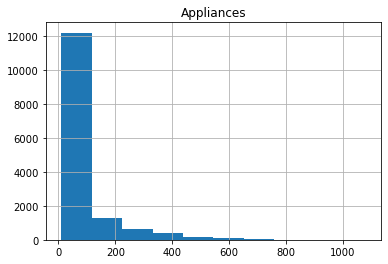

In [33]:
#Distribution of values in Applainces column
target_vars.hist()

* 1.Temperature - All the columns follow normal distribution except T9

* 2.Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house
* 3.Appliance - This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column
* 4.Visibilty - This column is negatively skewed
* 5.Windspeed - This column is postively skewed


**Hence, there are no feature independent feature with a linear relationship with the target.**

In [ ]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

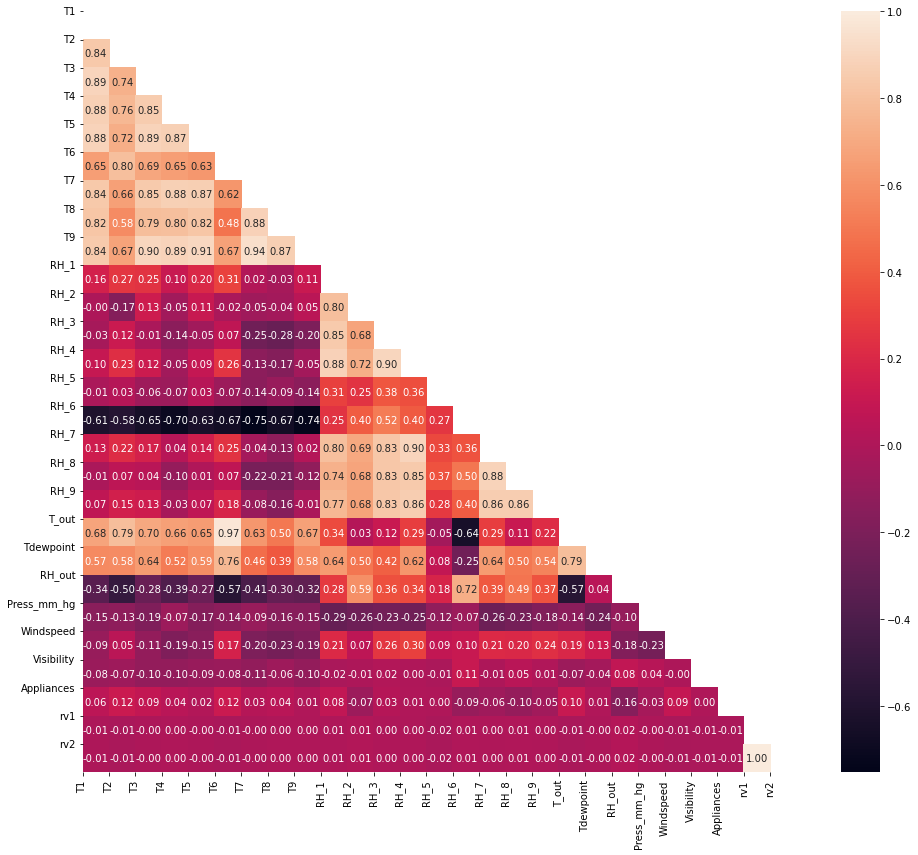

In [17]:
# Use the weather , temperature , applainces and random column to see the correlation
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [34]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974683
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791553
dtype: float64

* Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

* Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values.

* Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.

* Random variables have no role to play over here .

### Data Pre Processing

In [35]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [36]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [37]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

In [38]:
# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [39]:
print(train_X.columns)
print(test_X.columns)

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')
Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')


In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [41]:
sc_train.head(5)

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [42]:
sc_train.head(5)

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [43]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [44]:
train_X.head(5)

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602


In [45]:
test_y.head(5)

6314    -0.367942
12257    3.087003
6271    -0.664080
18179   -0.565367
9661     0.224334
Name: Appliances, dtype: float64

### model feasibility

We will be looking at following Algorithms

1.Ridge regression

2.Lasso regression

3.Support vector regression

4.KNeighborsRegressor

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

8.XGBRegressor


In [46]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [47]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
         ]

In [48]:
# Run all the proposed models and update the information in a list model_data

import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 132
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)
    
%time model_data

Wall time: 0 ns


[{'Name': 'Lasso: ',
  'Train_Time': 0.010904073715209961,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge: ',
  'Train_Time': 0.008359909057617188,
  'Train_R2_Score': 0.1375528613228284,
  'Test_R2_Score': 0.12139099895516814,
  'Test_RMSE_Score': 0.937341453817568},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.003991603851318359,
  'Train_R2_Score': 0.6814826882446664,
  'Test_R2_Score': 0.4855598647200512,
  'Test_RMSE_Score': 0.7172448224141802},
 {'Name': 'SVR:',
  'Train_Time': 14.110663652420044,
  'Train_R2_Score': 0.2357236318568957,
  'Test_R2_Score': 0.20993387920257744,
  'Test_RMSE_Score': 0.888856636807884},
 {'Name': 'RandomForest ',
  'Train_Time': 33.18016266822815,
  'Train_R2_Score': 0.9400163521847664,
  'Test_R2_Score': 0.5547287020522023,
  'Test_RMSE_Score': 0.6672865186318376},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 9.977682113647461,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.6392442860450407,


In [49]:
# Convert list to dataframe
df1 = pd.DataFrame(model_data)
df1

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.010904,0.000000,0.000000,1.000000
1,Ridge:,0.008360,0.137553,0.121391,0.937341
2,KNeighborsRegressor:,0.003992,0.681483,0.485560,0.717245
3,SVR:,14.110664,0.235724,0.209934,0.888857
4,RandomForest,33.180163,0.940016,0.554729,0.667287
5,ExtraTreeRegressor :,9.977682,1.000000,0.639244,0.600629
6,GradientBoostingClassifier:,7.557306,0.333526,0.232939,0.875820
7,XGBRegressor:,1.322572,0.844009,0.458513,0.735858


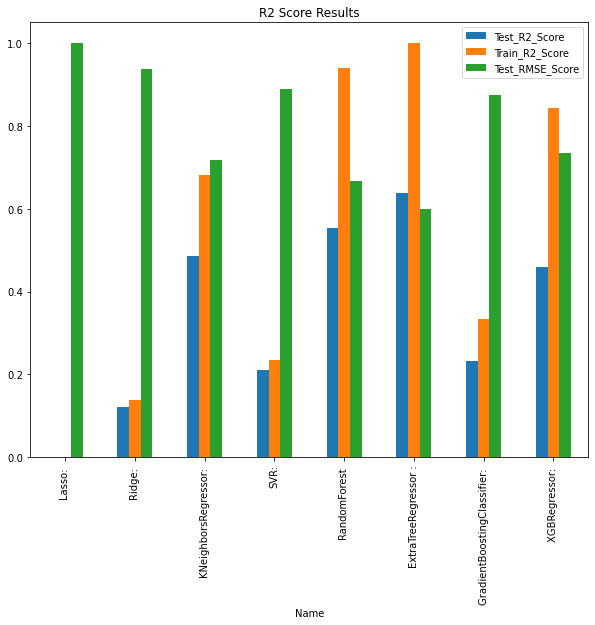

In [50]:
df1.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

* Best results over test set are given by Extra Tree Regressor with R2 score of 0.63
* Least RMSE score is also by Extra Tree Regressor 0.60
* Lasso regularization over Linear regression was worst performing model

### Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [53]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 150}

In [54]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=150,
                    random_state=40)

In [55]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

1.0

In [56]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.6320200276731016

In [57]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6066135279788099

* Based on parameter tunning step we can see that

* Best possible parameter combination are - 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 150
* Training set R2 score of 1.0 may be signal of overfitting on training set
* No changes on Test set R2 score 
* No changes on Test set RMSE score 

### Feature Importance

In [58]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

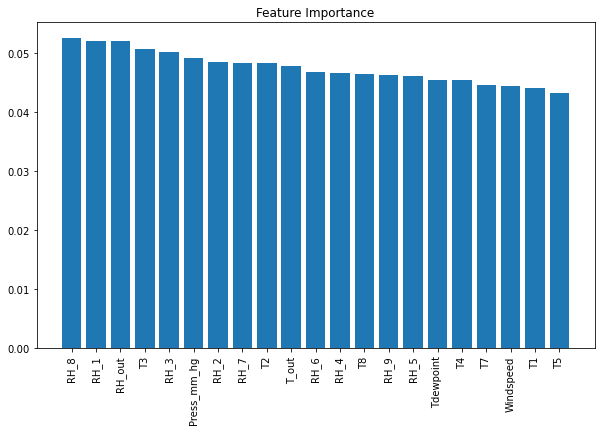

In [59]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [60]:
# Get top 5 most important feature 
names[0:5]

['RH_8', 'RH_1', 'RH_out', 'T3', 'RH_3']

In [61]:
# Get 5 least important feature 
names[-5:]

['T4', 'T7', 'Windspeed', 'T1', 'T5']

In [63]:
# Reduce test & training set to 5 feature set
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [64]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=150,
                    random_state=40)

In [65]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999837366325176
Testing set R2 Score -  0.4751889249428549
Testing set RMSE Score -  0.7244384549823022


## Summary and next steps

### Observations

* Based on parameter tunning step we can see that

* a. 5 most important features are - 'RH_8', 'RH_1', 'RH_out', 'T3', 'RH_3

* b. 5 least important features are - 'T4', 'T7', 'Windspeed', 'T1', 'T5'

* As can be observed with R2 Score , compared to Tuned model 0.63 the R2 score has come down to 0.47
* The reduction in R2 score is high and we should not use reduced feature set for this data set

###  Conclusion

* The best Algorithm to use for this dataset Extra Trees Regressor

* The untuned model was able to explain 63% of variance on test set . Although after tuned no changes

* The final model had 22 features

* Feature reduction was not able to add to better R2 score

**1. How can we improve this perceived system?**

* As per my obserbation distribution of data set is not good. Ballanced data set can give better R2, Hence model can be imroved.

* Modifying parameters of the Grid Search parameter space. Add more parameters like min_samples_split,min_inpurity_decrease etc.

* Feature Engineering 

**2. what challenges do you see in deploying this system?**

* Feature scaling is very important for regressions models
* It is very important to check the intercorrelation between all the variables in order to remove the redundant features with high correlation values.

**3. can you propose a timeline based on this PoC for this development?**

* That todally depands on the Clients requirement and there expection. If that stands out we can otherwise no. Generaly this model is not good at all. 


## References (add your references below)
[1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,

[2] Python documentation